In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

# Load the dataset
file_path = 'housing.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)



   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
longitude               0
latitude                0
housing_median_age     

Mean Squared Error on training set: 4830747908.679783
Mean Squared Error on validation set: 4506517250.079856


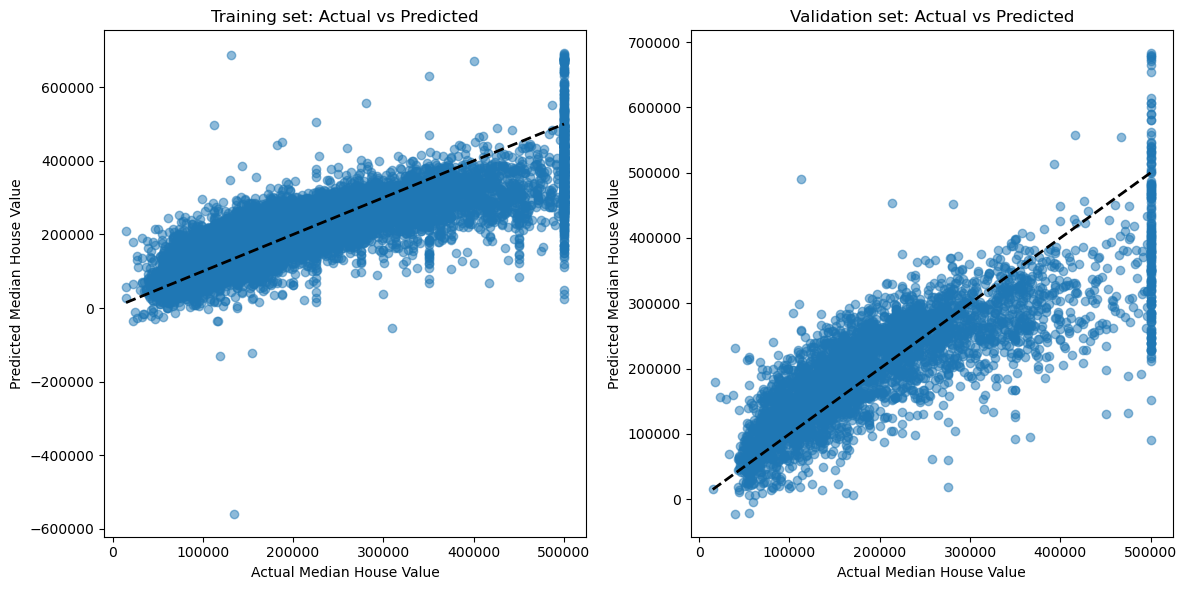

0.6506786497495689

In [30]:
# Drop rows with missing values
data.dropna(inplace=True)

# One-hot encode the categorical feature
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# median_house_value is the target variable
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training, validation, and test sets (60/20/20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train a simple linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = lr.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f'Mean Squared Error on training set: {mse_train}')

# Evaluate the model on the validation set
y_val_pred = lr.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error on validation set: {mse_val}')

# Visualization of model predictions vs actual values
plt.figure(figsize=(12, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--k', linewidth=2)
plt.title('Training set: Actual vs Predicted')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')

# Validation set
plt.subplot(1, 2, 2)
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], '--k', linewidth=2)
plt.title('Validation set: Actual vs Predicted')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')

plt.tight_layout()
plt.show()

lr.score(X_test, y_test)


Mean Squared Error on Validation Set: 4909522771.122339
R^2 Score on Validation Set: 0.6279079251863288


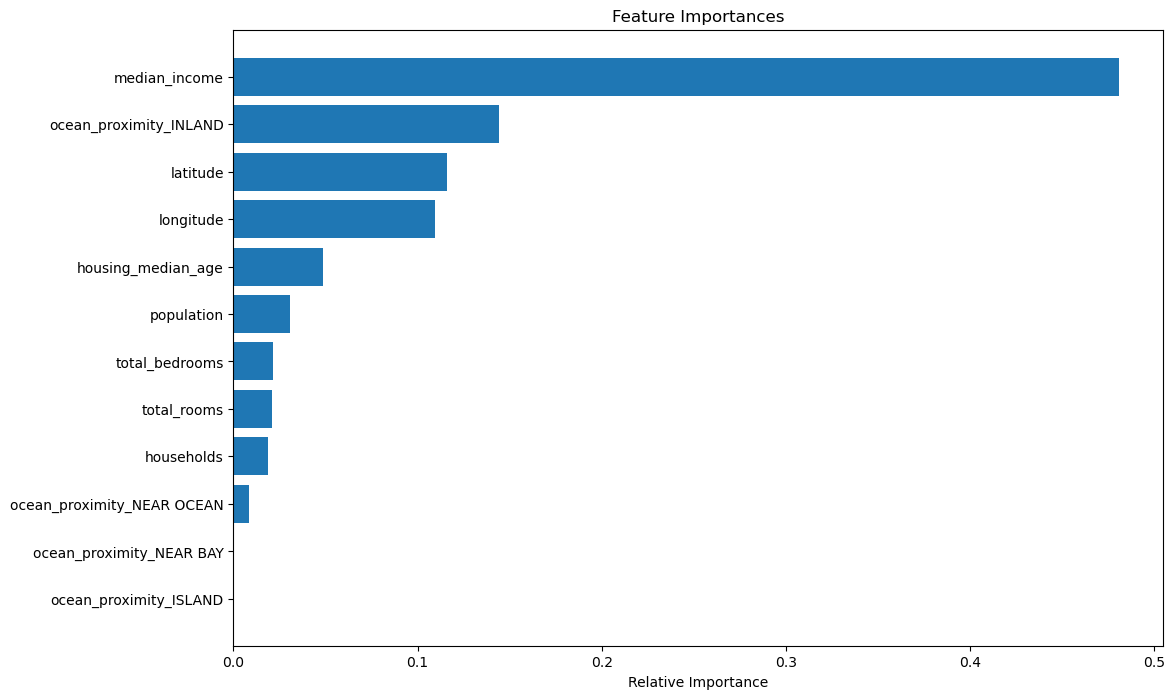

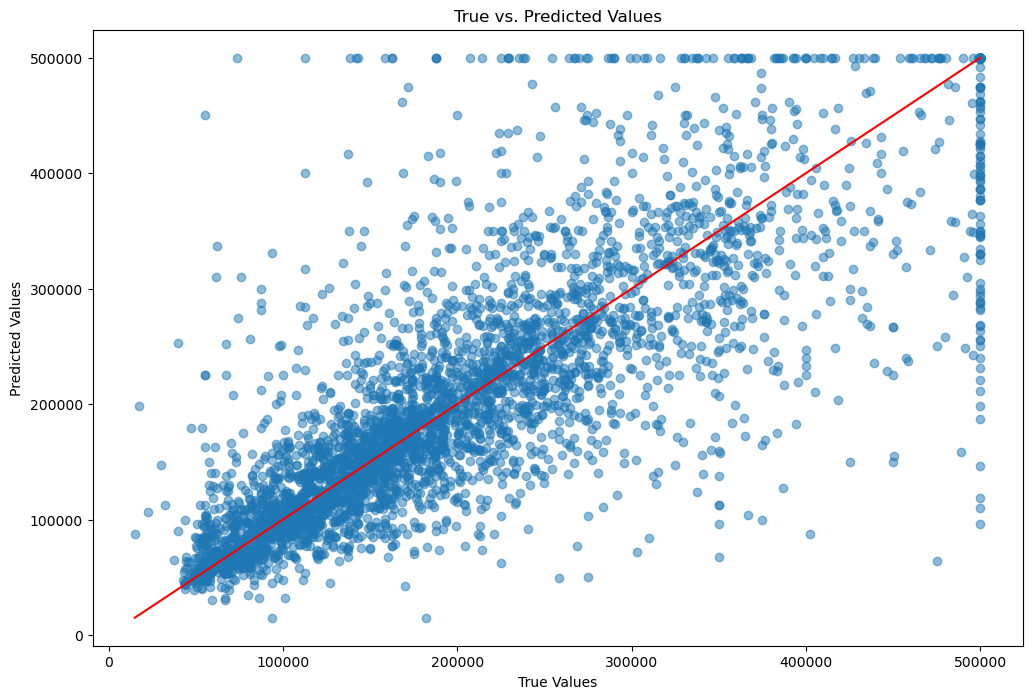

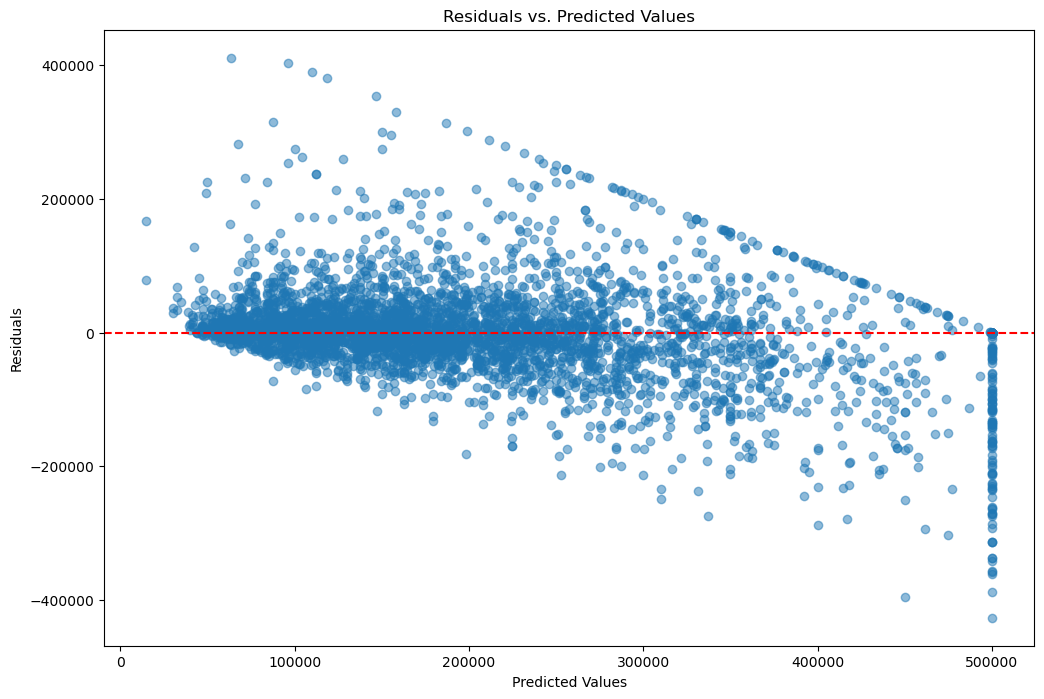

In [31]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

y_val_pred = dt_regressor.predict(X_val)

mse_val = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error on Validation Set: {mse_val}")
r2_score_val = dt_regressor.score(X_val, y_val)
print(f"R^2 Score on Validation Set: {r2_score_val}")

# Assuming you've already trained your DecisionTreeRegressor model as 'dt_regressor'
# and you've split your data into X_train, X_val, y_train, y_val

# 1. Feature Importance
features = X_train.columns
importances = dt_regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 2. Actual vs. Predicted Values
y_val_pred = dt_regressor.predict(X_val)  # Predictions on the validation set

plt.figure(figsize=(12, 8))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # 45-degree line
plt.show()

# 3. Residuals Plot
residuals = y_val - y_val_pred

plt.figure(figsize=(12, 8))
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')  # Line at 0 for reference
plt.show()